# **Meme kanseri veri seti ile Destek Vektör Makinesi uygulama not defteri**

***Makine öğreniminde, destek vektör makineleri (SVM'ler, ayrıca destek vektör ağları), sınıflandırma ve regresyon analizi için kullanılan verileri analiz eden ilişkili öğrenme algoritmalarına sahip denetimli öğrenme modelleridir. Her biri iki kategoriden birine veya diğerine ait olarak işaretlenmiş bir dizi eğitim örneği verildiğinde, bir SVM eğitim algoritması yeni örnekleri bir kategoriye veya diğerine atayan bir model oluşturur ve bu da onu olasılıksal olmayan bir ikili doğrusal sınıflandırıcı yapar (olasılıksal bir sınıflandırma ortamında SVM kullanmak için Platt ölçeklendirme gibi yöntemler mevcut olsa da). Bir SVM modeli, örneklerin uzayda noktalar olarak temsilidir ve ayrı kategorilerin örnekleri mümkün olduğunca geniş bir aralıkla bölünecek şekilde eşleştirilir. Yeni örnekler daha sonra aynı uzaya eşlenir ve boşluğun hangi tarafına düştüklerine bağlı olarak bir kategoriye ait oldukları tahmin edilir. Bu boşluk aynı zamanda maksimum marj olarak adlandırılır ve DVM sınıflandırıcıya maksimum marj sınıflandırıcı denir.***

***DVM'ler doğrusal sınıflandırma yapmanın yanı sıra, çekirdek hilesi olarak adlandırılan ve girdilerini dolaylı olarak yüksek boyutlu özellik uzaylarına eşleyen bir yöntem kullanarak doğrusal olmayan bir sınıflandırmayı da verimli bir şekilde gerçekleştirebilir.***

# **Kütüphaneleri içe aktarma ve veri yükleme**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **Verileri Alın**

***Scikit Learn'deki yerleşik meme kanseri veri setini kullanacağız. Yükleme fonksiyonuna dikkat edin:***

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

***Veri seti bir sözlük formunda sunulmuştur***

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

***Veri çerçevesi oluşturmak ve özellikleri anlamak için bu sözlükten bilgi ve dizileri alabiliriz.***

***Özelliklerin açıklaması aşağıdaki gibidir ;***

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# **Özellik adlarını göster**

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# **DataFrame'i ayarlama**

In [8]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Eksik veri var mı?**


In [10]:
np.sum(pd.isnull(df).sum()) # Veri çerçevesinin tüm sütunlarındaki null nesnelerin sayısının toplamı

0

# **Veri setindeki 'hedef' veriler nelerdir?**

In [11]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Keşifsel Veri Analizi**

***İyi huylu (0) ve kötü huylu (1) kanser vakalarının göreceli sayılarını kontrol edin***

<AxesSubplot:xlabel='Cancer', ylabel='count'>

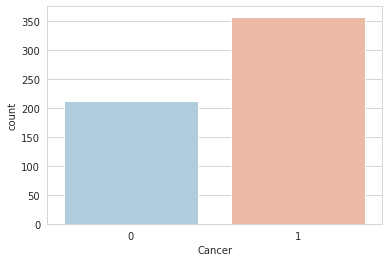

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Cancer', data=df, palette='RdBu_r')

# **'0' ve '1' KANSER SONUCU için tüm ortalama özelliklerin (ilk 10 sütun) kutu grafiklerini çizmek üzere bir 'for' döngüsü çalıştırın**

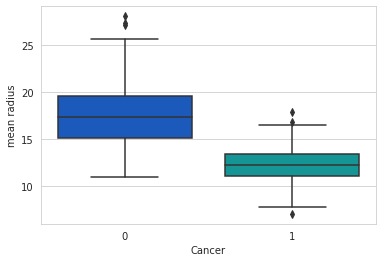

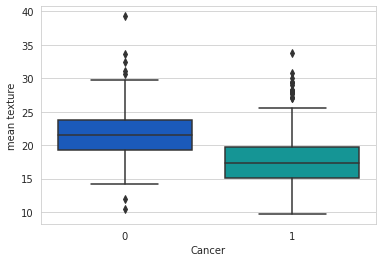

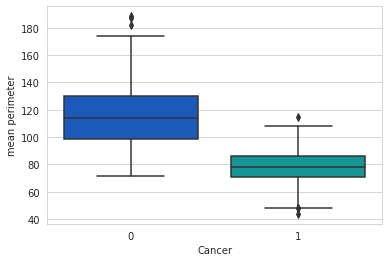

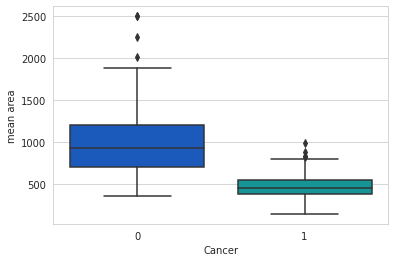

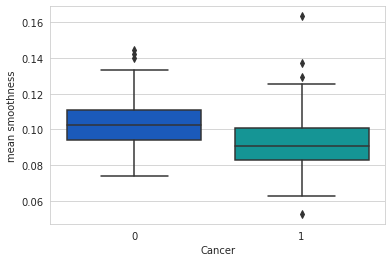

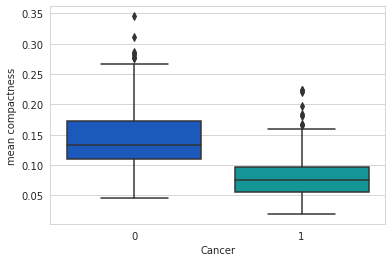

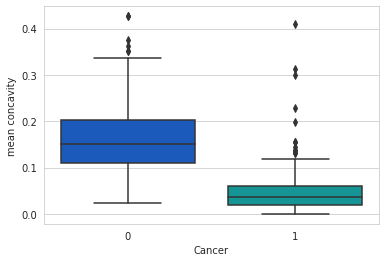

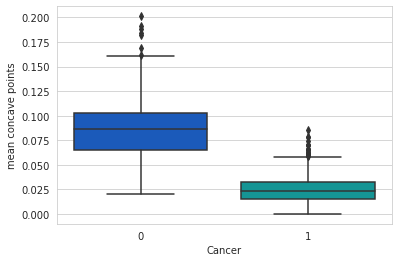

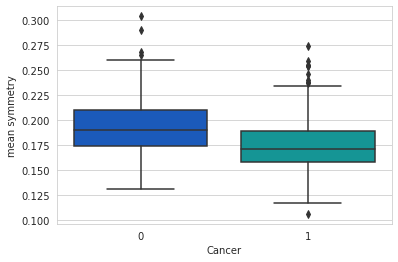

<Figure size 432x288 with 0 Axes>

In [14]:
l = list(df.columns[0:10])
for i in range(len(l)-1):
  sns.boxplot(x='Cancer', y=l[i], data = df, palette='winter')
  plt.figure()

# **Tüm özellikler kanser tahminlerini aynı netlikte ayırmaz**

***Örneğin, aşağıdaki iki grafikten, daha küçük alanın genellikle pozitif kanser tespitinin göstergesi olduğu açıkken, ortalama pürüzsüzlük grafiğinden somut bir şey söylenemez.***

Text(0.5, 1.0, 'Cancer cases as a function of mean smoothness')

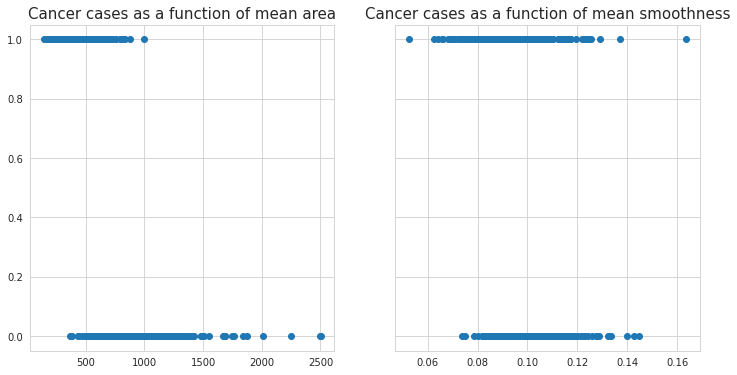

In [16]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax1.scatter(df['mean area'], df['Cancer'])
ax1.set_title("Cancer cases as a function of mean area", fontsize=15)
ax2.scatter(df['mean smoothness'], df['Cancer'])
ax2.set_title("Cancer cases as a function of mean smoothness", fontsize=15)


# **Eğitim ve tahmin**

***Tren Test Bölünmesi***

In [17]:
df_feat = df.drop('Cancer', axis=1) # Yalnızca özellikler içeren bir veri çerçevesi tanımlama
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df_target = df['Cancer'] # Yalnızca hedef sonuçları, yani kanser tespitlerini içeren bir veri çerçevesi tanımlayın
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Cancer, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)

In [21]:
y_train.head()

178    1
421    1
57     0
514    0
548    1
Name: Cancer, dtype: int64

# **Destek Vektör Sınıflandırıcısını Eğitme**


In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(X_train, y_train)

SVC()

# **Tahminler ve Değerlendirmeler**

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

***Her şeyi tek bir sınıfta sınıflandırdığımıza dikkat edin! Bu, modelimizin parametrelerinin ayarlanması gerektiği anlamına gelir (verileri normalleştirmek de yardımcı olabilir)***

In [28]:
print(confusion_matrix(y_test, predictions))

[[ 56  10]
 [  3 102]]


***Beklendiği gibi, sınıflandırma karnesi kötü***

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# **Gridsearch**

*Doğru parametreleri bulmak (hangi C veya gama değerlerinin kullanılacağı gibi) zor bir iştir! Ancak neyse ki Scikit-learn, GridSearchCV ile yerleşik olarak bir dizi kombinasyonu deneme ve hangisinin en iyi sonucu verdiğini görme işlevine sahiptir! CV çapraz doğrulama anlamına gelir.*

***GridSearchCV, denenmesi gereken parametreleri ve eğitilecek bir modeli tanımlayan bir sözlük alır. Parametre ızgarası, anahtarların parametreler ve değerlerin test edilecek ayarlar olduğu bir sözlük olarak tanımlanır.***

In [30]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [31]:
from sklearn.model_selection import GridSearchCV

*GridSearchCV ile ilgili en güzel şeylerden biri, bir meta-tahmin edici olmasıdır. SVC gibi bir tahmin ediciyi alır ve tamamen aynı şekilde davranan yeni bir tahmin edici oluşturur - bu durumda, bir sınıflandırıcı gibi. refit=True eklemeli ve verbose'u istediğiniz sayıya seçmelisiniz, sayı ne kadar yüksekse o kadar verbose olur (verbose sadece süreci açıklayan metin çıktısı anlamına gelir).*

In [33]:
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=1)

*İlk olarak, en iyi parametre kombinasyonunu bulmak için aynı döngüyü çapraz doğrulama ile çalıştırır. En iyi kombinasyonu bulduktan sonra, en iyi parametre ayarını kullanarak tek bir yeni model oluşturmak için fit'e aktarılan tüm veriler üzerinde (çapraz doğrulama olmadan) fit'i tekrar çalıştırır.*

In [34]:
# Biraz zaman alabilir !
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

*GridSearchCV tarafından bulunan en iyi parametreleri best_params_ özniteliğinde ve en iyi tahmin ediciyi best_estimator_ özniteliğinde inceleyebilirsiniz.*

In [35]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

*Ardından, normal bir modelde yaptığınız gibi bu ızgara nesnesi üzerinde tahminleri yeniden çalıştırabilirsiniz.*

In [37]:
grid_predictions = grid.predict(X_test)

*Şimdi gelişmiş tahminleri görmek için karışıklık matrisini yazdırın.*

In [38]:
print(confusion_matrix(y_test, grid_predictions))

[[ 59   7]
 [  4 101]]


*Sınıflandırma raporu geliştirilmiş F1 skorunu göstermektedir.*

In [39]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# **GridSearch için başka bir parametre seti**

In [41]:
param_grid = {'C': [50, 75, 100, 125, 150], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [50, 75, 100, 125, 150],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

In [42]:
grid.best_estimator_

SVC(C=100, gamma=1e-05, tol=1e-05)

In [44]:
grid_pedictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

[[ 59   7]
 [  4 101]]
